# Geopandas



### Attawut Nardkulpat, Reseach Officer, Burapha University
### Reference: https://github.com/jorisvandenbossche/geopandas-tutorial
### attawut@buu.ac.th
### 09/11/2021

---------------------------------------------------------------

# Part 1 Introduction to geospatial vector data in Python

## Install Geopandas

In [1]:
#!pip install geopandas
#!pip install matplotlib
#!pip install pandas
#!pip install shapely

In [2]:
#conda install -c conda-forge geopandas

## Import Geopandas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

## Importing geospatial data
Geospatial data is often available from specific GIS file formats or data stores, like ESRI shapefiles, GeoJSON files, geopackage files, PostGIS (PostgreSQL) database, ...

We can use the GeoPandas library to read many of those GIS file formats (relying on the fiona library under the hood, which is an interface to GDAL/OGR), using the geopandas.read_file function.

In [4]:
countries = gpd.read_file("data/ne_110m_admin_0_countries.shp")

<AxesSubplot:>

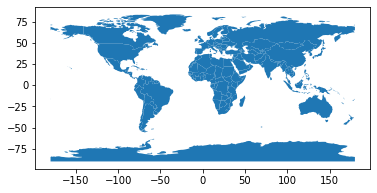

In [5]:
countries.plot()

## Exercise 1
สร้างตัวแปร BUU_point, BUU_line และ BUU_polygon

In [6]:
BUU_point = gpd.read_file("data/Building_BUU_point_wgs84.shp")
BUU_line = gpd.read_file("data/Road_BUU_wgs84.shp")
BUU_polygon = gpd.read_file("data/Boundary_BUU_wgs84.shp")

แสดงผลข้อมูล

<AxesSubplot:>

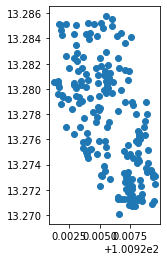

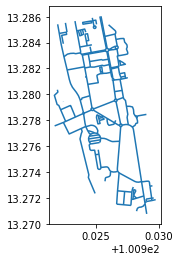

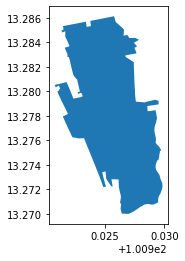

In [7]:
BUU_point.plot()
BUU_line.plot()
BUU_polygon.plot()

ดูหัวตารางของแต่ข้อมูล

In [8]:
BUU_point.head()

,Id,Name,Serviceare,Name_order,Servicenum,Area,Type,ORIG_FID,geometry
0,1,หอศิลปวัฒนธรรม ภาคตะวันออก,02.ลานธรรม,1. หอศิลปวัฒนธรรม ภาคตะวันออก,2,4254.197720,Building,0,POINT (100.92597 13.28501)
1,2,"อาคารเรียนรวม KA,KB.KC",02.ลานธรรม,"2. อาคารเรียนรวม KA,KB.KC",2,6531.489408,Building,1,POINT (100.92708 13.28363)
2,3,โครงการก่อสร้างศูนย์การเรียนรู้,08.สนามหญ้าหลังอาคารเรียนคณะเภสัชฯ,3. โครงการก่อสร้างศูนย์การเรียนรู้,8,2562.547955,Building,2,POINT (100.92653 13.28248)
3,4,อาคารเรียนคณะเภสัช,08.สนามหญ้าหลังอาคารเรียนคณะเภสัชฯ,4. อาคารเรียนคณะเภสัช,8,3055.459077,Building,3,POINT (100.92660 13.28163)
4,5,คณะเภสัชศาสตร์,08.สนามหญ้าหลังอาคารเรียนคณะเภสัชฯ,5. คณะเภสัชศาสตร์,8,725.140707,Building,4,POINT (100.92708 13.28149)


In [9]:
BUU_line.head()

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,Lenght,geometry
0,154653502,5141,service,None,None,B,0,0.0,F,F,65.703677,"LINESTRING (100.92459 13.27616, 100.92456 13.2..."
1,154653503,5141,service,None,None,B,0,0.0,F,F,101.572195,"LINESTRING (100.92440 13.27655, 100.92533 13.2..."
2,154653504,5122,residential,None,None,B,0,0.0,F,F,485.426263,"LINESTRING (100.92373 13.28318, 100.92383 13.2..."
3,154653505,5122,residential,None,None,B,0,0.0,F,F,615.042666,"LINESTRING (100.92861 13.27325, 100.92837 13.2..."
4,154653506,5122,residential,None,None,B,0,0.0,F,F,848.986408,"LINESTRING (100.92706 13.27761, 100.92718 13.2..."


In [10]:
BUU_polygon.head()

,Id,area,arearai,Name,geometry
0,0,1.004277e+06,627.673338,Burapha University,"POLYGON ((100.92146 13.28532, 100.92189 13.285..."


----------------------

 ## GeoDataFrame

In [11]:
type(countries)

geopandas.geodataframe.GeoDataFrame

In [12]:
countries.geometry

0      MULTIPOLYGON (((180.00000 -16.06713, 180.00000...
1      POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...
2      POLYGON ((-8.66559 27.65643, -8.66512 27.58948...
3      MULTIPOLYGON (((-122.84000 49.00000, -122.9742...
4      MULTIPOLYGON (((-122.84000 49.00000, -120.0000...
                             ...                        
172    POLYGON ((18.82982 45.90887, 18.82984 45.90888...
173    POLYGON ((20.07070 42.58863, 19.80161 42.50009...
174    POLYGON ((20.59025 41.85541, 20.52295 42.21787...
175    POLYGON ((-61.68000 10.76000, -61.10500 10.890...
176    POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...
Name: geometry, Length: 177, dtype: geometry

In [13]:
type(countries.geometry)

geopandas.geoseries.GeoSeries

In [14]:
countries.geometry.area

/Users/attawutn/opt/anaconda3/envs/SWU_tech/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0         1.639511
1        76.301964
2         8.603984
3      1712.995228
4      1122.281921
          ...     
172       8.604719
173       1.479321
174       1.231641
175       0.639000
176      51.196106
Length: 177, dtype: float64

In [15]:
countries['POP_EST'].mean()

41712369.84180791

In [16]:
africa = countries[countries['CONTINENT'] == 'Africa']

## Exercise 2

ตรวจสอบประเภทตัวแปรที่นิสิตสร้างขึ้น

In [17]:
type(BUU_point)

geopandas.geodataframe.GeoDataFrame

หาค่าเฉลี่ยของพื้นที่อาคาร

In [18]:
BUU_point['Area'].mean()

1386.2756741908001

ทำการเลือกเฉพาะข้อมูลถนนใน column fclass = residential

In [19]:
BUU_line_residential = BUU_line[BUU_line['fclass'] == 'residential']

In [20]:
BUU_line_residential

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,Lenght,geometry
2,154653504,5122,residential,None,None,B,0,0.0,F,F,485.426263,"LINESTRING (100.92373 13.28318, 100.92383 13.2..."
3,154653505,5122,residential,None,None,B,0,0.0,F,F,615.042666,"LINESTRING (100.92861 13.27325, 100.92837 13.2..."
4,154653506,5122,residential,None,None,B,0,0.0,F,F,848.986408,"LINESTRING (100.92706 13.27761, 100.92718 13.2..."
5,154653507,5122,residential,None,None,B,0,0.0,F,F,68.051048,"LINESTRING (100.92645 13.27954, 100.92646 13.2..."
6,154653508,5122,residential,None,None,B,0,0.0,F,F,39.473363,"LINESTRING (100.92394 13.27852, 100.92394 13.2..."
7,154653509,5122,residential,None,None,B,0,0.0,F,F,69.574691,"LINESTRING (100.92464 13.27876, 100.92461 13.2..."
9,154653511,5122,residential,None,None,B,0,0.0,F,F,114.056603,"LINESTRING (100.92717 13.27146, 100.92726 13.2..."
10,154653512,5122,residential,None,None,B,0,0.0,F,F,168.519711,"LINESTRING (100.92686 13.27637, 100.92631 13.2..."
12,154653514,5122,residential,None,None,B,0,0.0,F,F,793.589278,"LINESTRING (100.92194 13.28541, 100.92207 13.2..."
13,154653515,5122,residential,None,None,B,0,0.0,F,F,123.166219,"LINESTRING (100.92776 13.27141, 100.92717 13.2..."


## Geometries: Points, Linestrings and Polygons

Spatial **vector** data can consist of different types, and the 3 fundamental types are:

![](img/simple_features_3_text.svg)

* **Point** data: represents a single point in space.
* **Line** data ("LineString"): represents a sequence of points that form a line.
* **Polygon** data: represents a filled area.

In [21]:
print(countries.geometry[1])

POLYGON ((33.90371119710453 -0.9500000000000001, 34.07261999999997 -1.059819999999945, 37.69868999999994 -3.096989999999948, 37.7669 -3.67712, 39.20222 -4.67677, 38.74053999999995 -5.908949999999948, 38.79977000000008 -6.475660000000005, 39.44 -6.839999999999861, 39.47000000000014 -7.099999999999966, 39.19468999999998 -7.703899999999976, 39.25203000000005 -8.007809999999949, 39.18652000000009 -8.48550999999992, 39.53574000000009 -9.112369999999885, 39.94960000000003 -10.09840000000003, 40.31658622911085 -10.31709775281749, 40.31659000000002 -10.31709999999987, 39.52099999999996 -10.89688000000001, 38.42755659358775 -11.28520232508166, 37.82763999999997 -11.26878999999991, 37.47128999999995 -11.56876, 36.77515099462281 -11.59453744878081, 36.51408165868426 -11.72093800216673, 35.31239790216904 -11.43914641687915, 34.55998904799935 -11.52002003341592, 34.27999999999997 -10.16000000000003, 33.94083772409653 -9.693673841980285, 33.73972000000009 -9.417149999999992, 32.75937544122132 -9.230

In [22]:
type(countries.geometry[1])

shapely.geometry.polygon.Polygon

In [23]:
countries.area

/Users/attawutn/opt/anaconda3/envs/SWU_tech/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0         1.639511
1        76.301964
2         8.603984
3      1712.995228
4      1122.281921
          ...     
172       8.604719
173       1.479321
174       1.231641
175       0.639000
176      51.196106
Length: 177, dtype: float64

## Exercise 3
เช็ค Geometry ข้อมูล

In [24]:
print(BUU_point.geometry[0])

POINT (100.9259731486036 13.28500932101095)


In [25]:
print(BUU_line.geometry[1])

LINESTRING (100.9244015310361 13.27654789233344, 100.9253278310729 13.2766874921368)


In [26]:
print(BUU_polygon.geometry[0])

POLYGON ((100.9214601151722 13.28532105420133, 100.921892814558 13.28540463822576, 100.9224627873266 13.28550861036977, 100.9228494480141 13.28558433454595, 100.9231560379824 13.28564149278728, 100.9234174208829 13.28568896902865, 100.9234409017186 13.28550848825933, 100.9234799525987 13.28525902063992, 100.9238350118854 13.28532998823286, 100.9238125841167 13.28548296120786, 100.9237885509264 13.28575441081233, 100.9242791251181 13.28584558773052, 100.9247564308343 13.2859383944457, 100.9249895941063 13.28598216073686, 100.9252560468926 13.28603677050012, 100.9254781528845 13.28607775043724, 100.9257539485431 13.28613151690501, 100.9257767393332 13.28613502750104, 100.9258843752467 13.28576447597892, 100.9259082955044 13.28567706078223, 100.9260916227767 13.28551899604784, 100.9264541480222 13.28519945407785, 100.9265338657558 13.28512883368796, 100.9265892062899 13.2850629508509, 100.9266149383432 13.28498240881203, 100.9266075314636 13.28493483046817, 100.9266003752267 13.2849041614

## Plotting our different layers together

<AxesSubplot:>

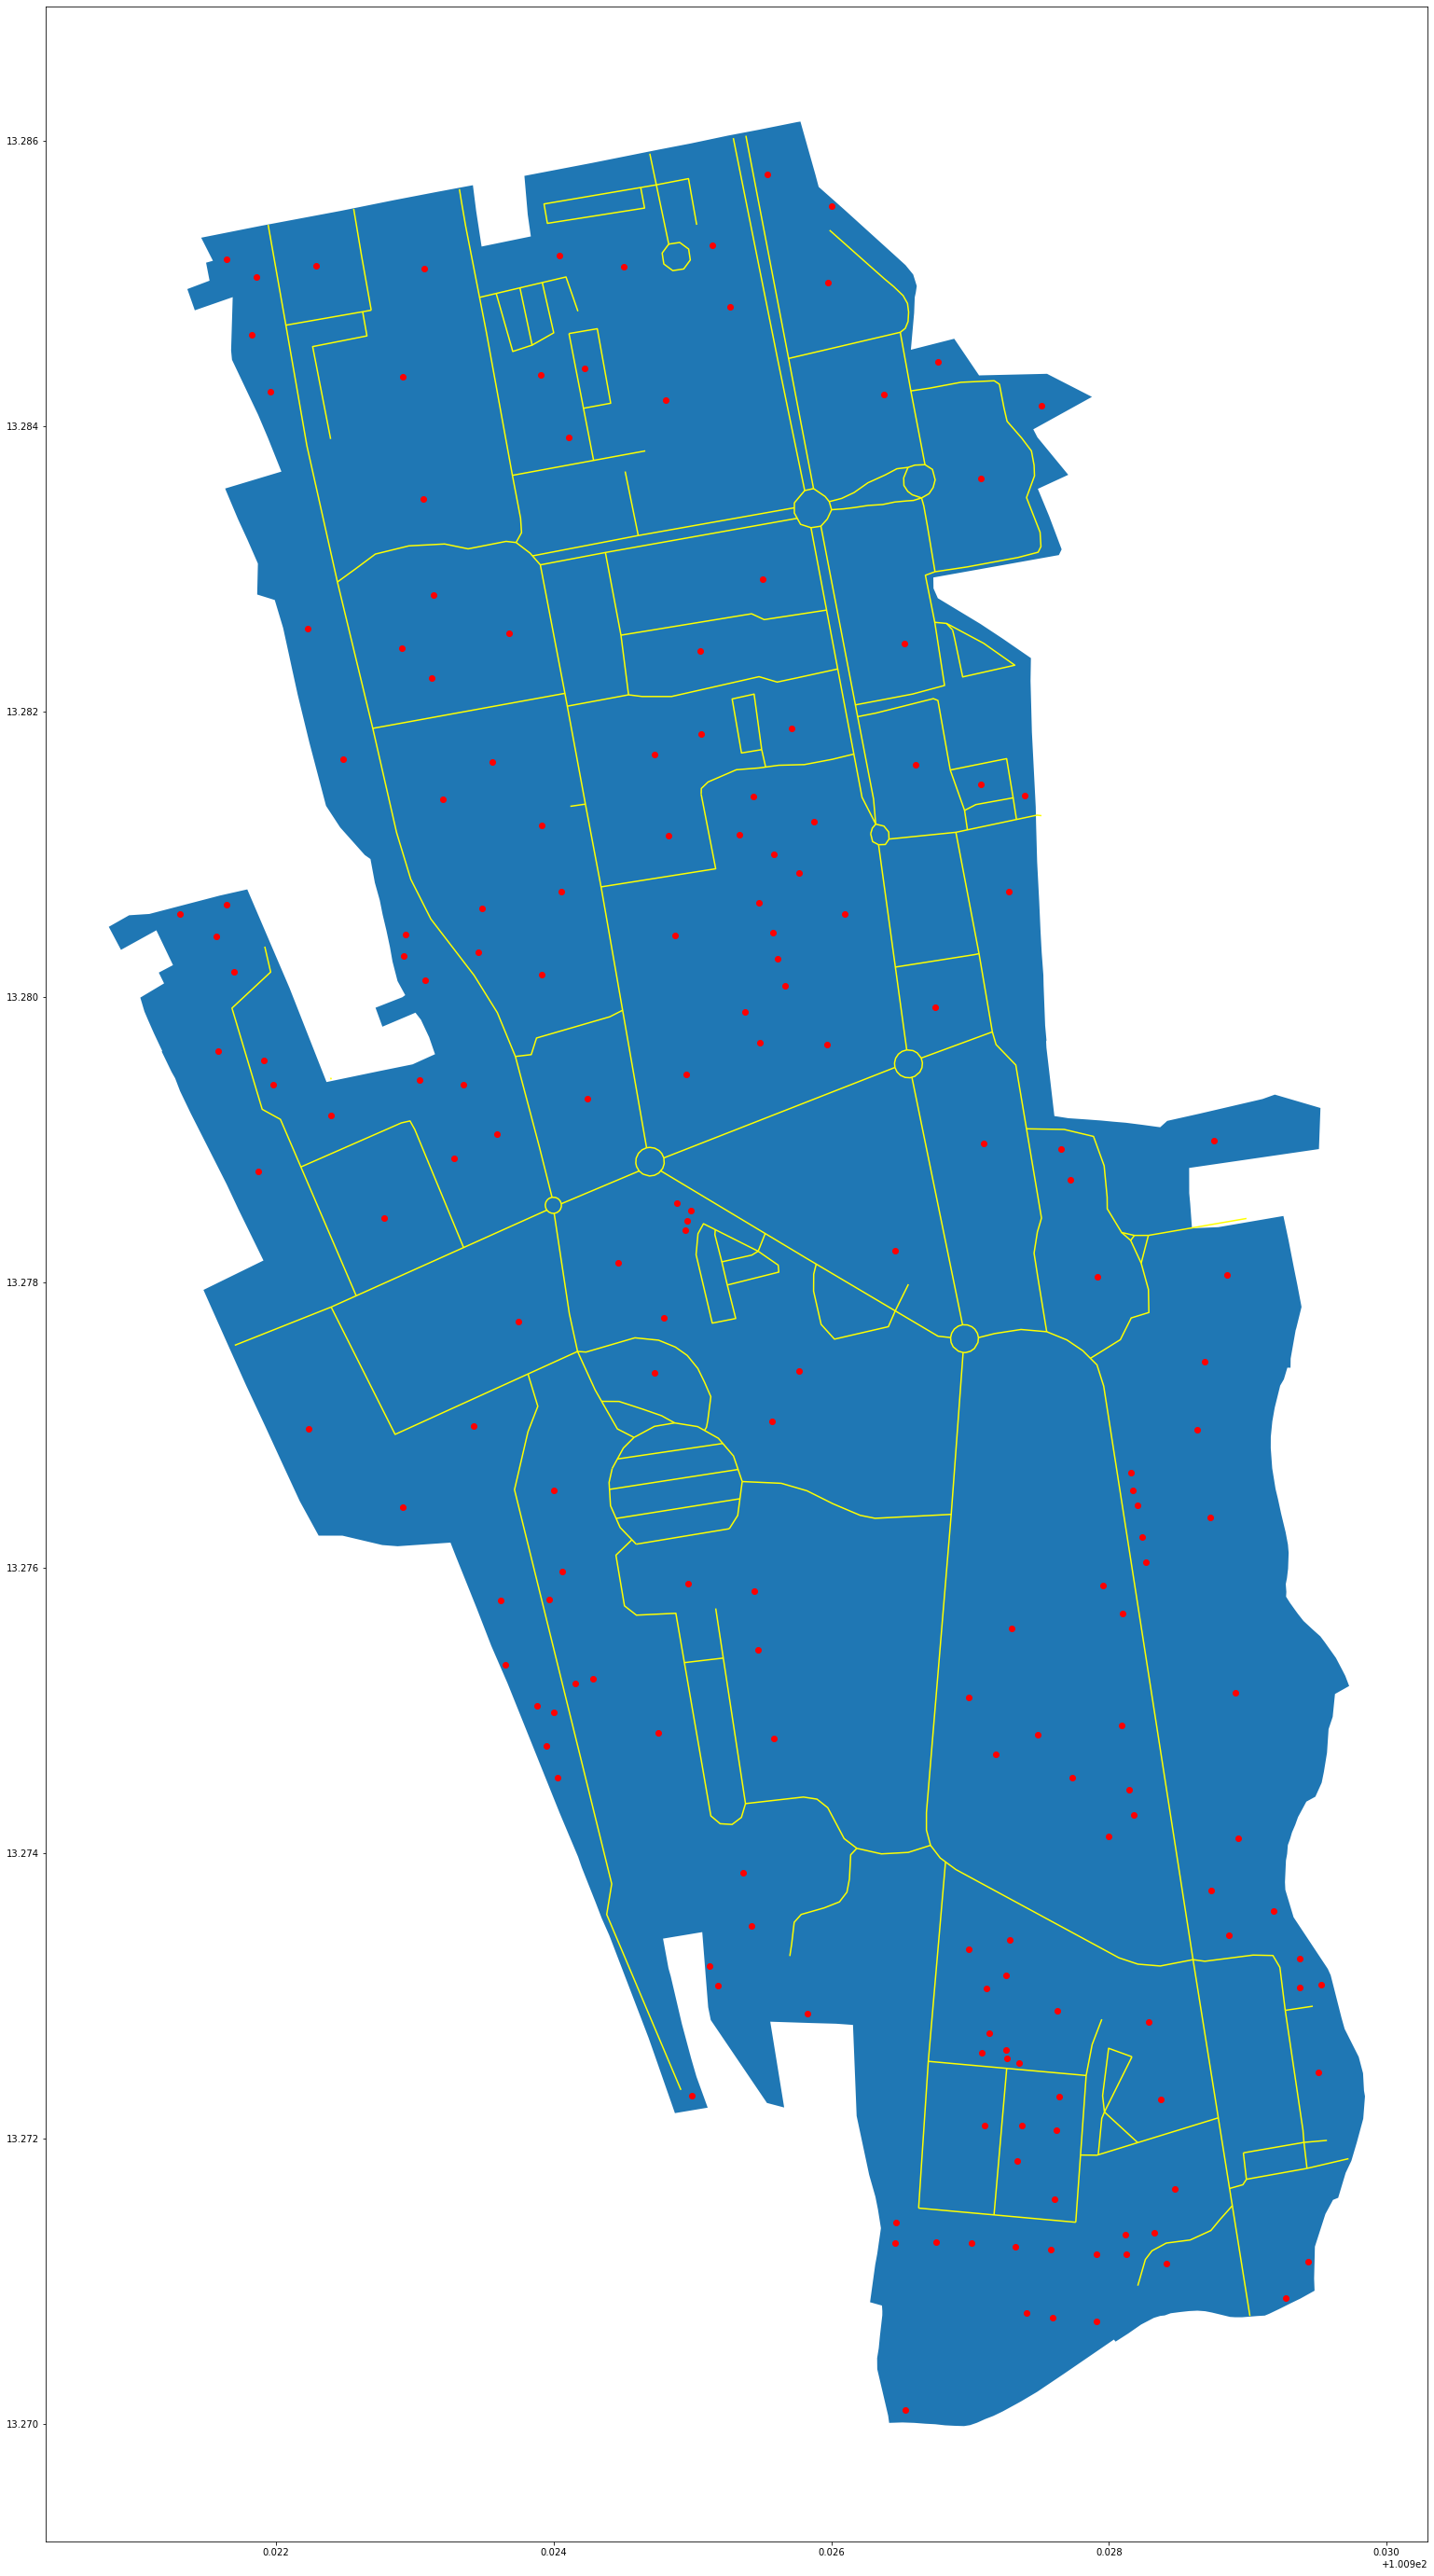

In [27]:
ax = BUU_polygon.plot(figsize=(50, 50))
BUU_point.plot(ax=ax, color='red')
BUU_line.plot(ax=ax,color='yellow')

-----------

# Part 2 Coordinate reference systems

### Projected coordinates

> `(x, y)` coordinates are usually in meters or feet

![](img/projection.png)

<table><tr>
<td> <img src="img/projections-AlbersEqualArea.png"/> </td>
<td> <img src="img/projections-Mercator.png"/> </td>
</tr>
<tr>
<td> <img src="img/projections-Robinson.png"/> </td>
</tr></table>

**Projected size vs actual size (Mercator projection)**:

![](img/mercator_projection_area.gif)

## Coordinate Reference Systems in Python / GeoPandas

The `.crs` attribute is given as a dictionary. In this case, it only indicates the EPSG code, but it can also contain the full "proj4" string (in dictionary form).

Possible CRS representation:

- **`proj4` string**  
  
  Example: `+proj=longlat +datum=WGS84 +no_defs`

  Or its dict representation: `{'proj': 'longlat', 'datum': 'WGS84', 'no_defs': True}`

- **EPSG code**
  
  Example: `EPSG:4326` = WGS84 geographic CRS (longitude, latitude)
  
- Well-Know-Text (WKT) representation (better support coming with PROJ6 in the next GeoPandas version)

See eg https://epsg.io/4326

Under the hood, GeoPandas uses the `pyproj` / `PROJ` libraries to deal with the re-projections.

For more information, see also http://geopandas.readthedocs.io/en/latest/projections.html.

In [28]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

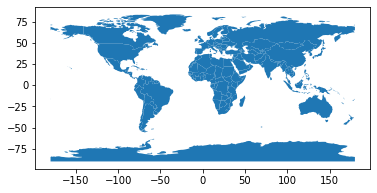

In [29]:
countries.plot()

## Exercise 4
เช็ค Coordinate Reference System ของข้อมูล

In [30]:
BUU_point.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Transforming to another CRS

In [31]:
# remove Antartica, as the Mercator projection cannot deal with the poles
countries = countries[(countries['NAME'] != "Antarctica")]

In [32]:
countries_mercator = countries.to_crs({'init': 'epsg:3395'})

/Users/attawutn/opt/anaconda3/envs/SWU_tech/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

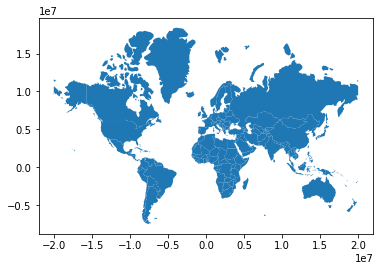

In [33]:
countries_mercator.plot()

## Exercise 5
แปลงระบบพิกัดของข้อมูลจาก WGS84 Geographic Coordinate เป็น WGS84 UTM Zone 47N

In [34]:
BUU_point_UTM47N = BUU_point.to_crs({'init': 'epsg:32647'})

/Users/attawutn/opt/anaconda3/envs/SWU_tech/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [35]:
BUU_point.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [36]:
BUU_point_UTM47N.crs

<Projected CRS: EPSG:32647>
Name: WGS 84 / UTM zone 47N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - N hemisphere - 96°E to 102°E - by country
- bounds: (96.0, 0.0, 102.0, 84.0)
Coordinate Operation:
- name: UTM zone 47N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Writing files
VARIABLE.to_file("NAME.shp")

In [37]:
BUU_point_UTM47N.to_file("BUU_point_UTM47N.shp")

----------------

# Part 3 Spatial relationships and operations

In [40]:
countries = gpd.read_file("zip://./data/ne_110m_admin_0_countries.zip")
cities = gpd.read_file("zip://./data/ne_110m_populated_places.zip")
rivers = gpd.read_file("zip://./data/ne_50m_rivers_lake_centerlines.zip")

## Spatial relationships

![](img/TopologicSpatialRelarions2.png)

(Image by [Krauss, CC BY-SA 3.0](https://en.wikipedia.org/wiki/Spatial_relation#/media/File:TopologicSpatialRelarions2.png))

### Relationships between individual objects

A polygon <small>(note: we use `.squeeze()` here to to extract the scalar geometry object from the GeoSeries of length 1)</small>:

In [41]:
belgium = countries.loc[countries['name'] == 'Belgium', 'geometry'].squeeze()

In [42]:
#2 Points
paris = cities.loc[cities['name'] == 'Paris', 'geometry'].squeeze()
brussels = cities.loc[cities['name'] == 'Brussels', 'geometry'].squeeze()

In [43]:
from shapely.geometry import LineString
line = LineString([paris, brussels])

<AxesSubplot:>

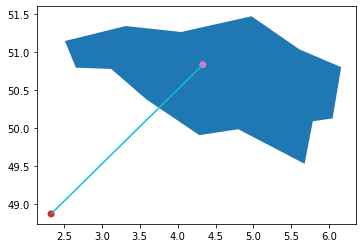

In [44]:
gpd.GeoSeries([belgium, paris, brussels, line]).plot(cmap='tab10')

In [45]:
brussels.within(belgium)

True

In [46]:
belgium.contains(brussels)

True

In [47]:
belgium.contains(paris)

False

In [48]:
paris.within(belgium)

False

In [49]:
belgium.contains(line)

False

In [50]:
line.intersects(belgium)

True

## Exercise 6
เช็คความสัมพันธ์ของข้อมูล

In [51]:
BUU_point.within(BUU_polygon)

/Users/attawutn/opt/anaconda3/envs/SWU_tech/lib/python3.6/site-packages/geopandas/base.py:32: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


0       True
1      False
2      False
3      False
4      False
       ...  
182    False
183    False
184    False
185    False
186    False
Length: 187, dtype: bool

In [52]:
BUU_point.contains(BUU_polygon)

/Users/attawutn/opt/anaconda3/envs/SWU_tech/lib/python3.6/site-packages/geopandas/base.py:32: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


0      False
1      False
2      False
3      False
4      False
       ...  
182    False
183    False
184    False
185    False
186    False
Length: 187, dtype: bool

In [53]:
BUU_point.intersects(BUU_polygon)

/Users/attawutn/opt/anaconda3/envs/SWU_tech/lib/python3.6/site-packages/geopandas/base.py:32: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


0       True
1      False
2      False
3      False
4      False
       ...  
182    False
183    False
184    False
185    False
186    False
Length: 187, dtype: bool

## Spatial operations

**Binary operations:**

<table><tr>
<td> <img src="img/spatial-operations-base.png"/> </td>
<td> <img src="img/spatial-operations-intersection.png"/> </td>
</tr>
<tr>
<td> <img src="img/spatial-operations-union.png"/> </td>
<td> <img src="img/spatial-operations-difference.png"/> </td>
</tr></table>

**Buffer:**

<table><tr>
<td> <img src="img/spatial-operations-buffer-point1.png"/> </td>
<td> <img src="img/spatial-operations-buffer-point2.png"/> </td>
</tr>
<tr>
<td> <img src="img/spatial-operations-buffer-line.png"/> </td>
<td> <img src="img/spatial-operations-buffer-polygon.png"/> </td>
</tr></table>


See https://shapely.readthedocs.io/en/stable/manual.html#spatial-analysis-methods for more details.

### Buffer

<AxesSubplot:>

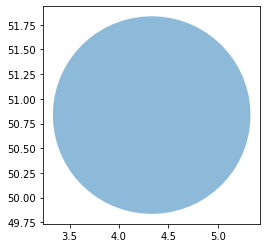

In [54]:
gpd.GeoSeries([brussels.buffer(1)]).plot(alpha=0.5, cmap='tab10')

<AxesSubplot:>

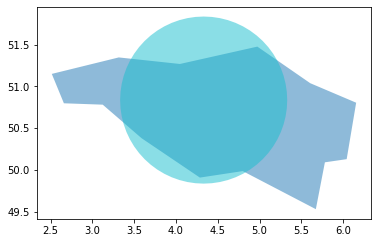

In [55]:
gpd.GeoSeries([belgium, brussels.buffer(1)]).plot(alpha=0.5, cmap='tab10')

### Intersection

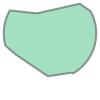

In [56]:
brussels.buffer(1).intersection(belgium)

### union

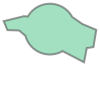

In [57]:
brussels.buffer(1).union(belgium)

### difference

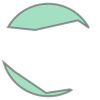

In [58]:
brussels.buffer(1).difference(belgium)

## Exercise 7
ให้นิสิตทดลองทำ Buffer, Union, Intersction กับข้อมูล

<AxesSubplot:>

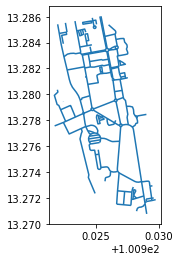

In [59]:
BUU_line.plot()

/Users/attawutn/opt/anaconda3/envs/SWU_tech/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


<AxesSubplot:>

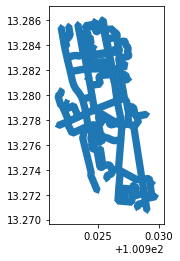

In [60]:
BUU_line.buffer(0.0003,resolution = 1).plot()

/Users/attawutn/opt/anaconda3/envs/SWU_tech/lib/python3.6/site-packages/geopandas/base.py:32: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


<AxesSubplot:>

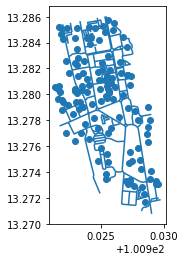

In [61]:
BUU_point.union(BUU_line).plot()

-----------

# Part 4 Spatial joins

In [62]:
cities2 = cities[cities['name'].isin(['Bern', 'Brussels', 'London', 'Paris'])].copy()
cities2['iso_a3'] = ['CHE', 'BEL', 'GBR', 'FRA']

In [63]:
cities2

,name,geometry,iso_a3
26,Bern,POINT (7.46698 46.91668),CHE
170,Brussels,POINT (4.33137 50.83526),BEL
219,London,POINT (-0.11867 51.50194),GBR
235,Paris,POINT (2.33139 48.86864),FRA


In [64]:
countries2 = countries[['iso_a3', 'name', 'continent']]
countries2.head()

,iso_a3,name,continent
0,AFG,Afghanistan,Asia
1,AGO,Angola,Africa
2,ALB,Albania,Europe
3,ARE,United Arab Emirates,Asia
4,ARG,Argentina,South America


In [65]:
cities2.merge(countries2, on='iso_a3')

,name_x,geometry,iso_a3,name_y,continent
0,Bern,POINT (7.46698 46.91668),CHE,Switzerland,Europe
1,Brussels,POINT (4.33137 50.83526),BEL,Belgium,Europe
2,London,POINT (-0.11867 51.50194),GBR,United Kingdom,Europe
3,Paris,POINT (2.33139 48.86864),FRA,France,Europe


## Recap - spatial relationships between objects

In [66]:
france = countries.loc[countries['name'] == 'France', 'geometry'].squeeze()

In [67]:
cities.within(france)

0      False
1      False
2      False
3      False
4      False
       ...  
238    False
239    False
240    False
241    False
242    False
Length: 243, dtype: bool

In [68]:
cities[cities.within(france)]

,name,geometry
10,Monaco,POINT (7.40691 43.73965)
13,Andorra,POINT (1.51649 42.50000)
186,Geneva,POINT (6.14003 46.21001)
235,Paris,POINT (2.33139 48.86864)


## Spatial join operation

<div class="alert alert-info" style="font-size:120%">
    
**SPATIAL JOIN** = *transferring attributes from one layer to another based on their spatial relationship* <br>
​
​
Different parts of this operations:
​
* The GeoDataFrame to which we want add information
* The GeoDataFrame that contains the information we want to add
* The spatial relationship we want to use to match both datasets ('intersects', 'contains', 'within')
* The type of join: left or inner join
​
​
![](img/illustration-spatial-join.svg)
​
</div>

In [69]:
joined = gpd.sjoin(cities, countries, op='within', how='left')

In [70]:
joined

,name_left,geometry,index_right,iso_a3,name_right,continent,pop_est,gdp_md_est
0,Vatican City,POINT (12.45339 41.90328),79.0,ITA,Italy,Europe,6.213780e+07,2221000.0
1,San Marino,POINT (12.44177 43.93610),79.0,ITA,Italy,Europe,6.213780e+07,2221000.0
2,Vaduz,POINT (9.51667 47.13372),9.0,AUT,Austria,Europe,8.754413e+06,416600.0
3,Lobamba,POINT (31.20000 -26.46667),152.0,SWZ,Swaziland,Africa,1.467152e+06,11060.0
4,Luxembourg,POINT (6.13000 49.61166),97.0,LUX,Luxembourg,Europe,5.941300e+05,58740.0
...,...,...,...,...,...,...,...,...
238,Rio de Janeiro,POINT (-43.22697 -22.92308),22.0,BRA,Brazil,South America,2.073534e+08,3081000.0
239,São Paulo,POINT (-46.62697 -23.55673),22.0,BRA,Brazil,South America,2.073534e+08,3081000.0
240,Sydney,POINT (151.18323 -33.91807),8.0,AUS,Australia,Oceania,2.323241e+07,1189000.0
241,Singapore,POINT (103.85387 1.29498),111.0,MYS,Malaysia,Asia,3.138199e+07,863000.0


In [71]:
joined['continent'].value_counts()

Asia             59
Africa           57
Europe           46
North America    26
South America    14
Oceania           8
Name: continent, dtype: int64

## Exercise 8
ให้นิสิต Spatial Join ระหว่างข้อมูลจุดที่ตั้งอาคารกับขอบเขตมหาวิทยาลัยบูรพา

In [72]:
BUU_point

,Id,Name,Serviceare,Name_order,Servicenum,Area,Type,ORIG_FID,geometry
0,1,หอศิลปวัฒนธรรม ภาคตะวันออก,02.ลานธรรม,1. หอศิลปวัฒนธรรม ภาคตะวันออก,2,4254.197720,Building,0,POINT (100.92597 13.28501)
1,2,"อาคารเรียนรวม KA,KB.KC",02.ลานธรรม,"2. อาคารเรียนรวม KA,KB.KC",2,6531.489408,Building,1,POINT (100.92708 13.28363)
2,3,โครงการก่อสร้างศูนย์การเรียนรู้,08.สนามหญ้าหลังอาคารเรียนคณะเภสัชฯ,3. โครงการก่อสร้างศูนย์การเรียนรู้,8,2562.547955,Building,2,POINT (100.92653 13.28248)
3,4,อาคารเรียนคณะเภสัช,08.สนามหญ้าหลังอาคารเรียนคณะเภสัชฯ,4. อาคารเรียนคณะเภสัช,8,3055.459077,Building,3,POINT (100.92660 13.28163)
4,5,คณะเภสัชศาสตร์,08.สนามหญ้าหลังอาคารเรียนคณะเภสัชฯ,5. คณะเภสัชศาสตร์,8,725.140707,Building,4,POINT (100.92708 13.28149)
...,...,...,...,...,...,...,...,...,...
182,0,None,None,None,0,8.323549,Building,182,POINT (100.92817 13.27654)
183,0,None,None,None,0,12.768843,Building,183,POINT (100.92816 13.27667)
184,0,None,None,None,0,382.512862,Building,184,POINT (100.92765 13.27894)
185,0,None,None,None,0,1046.639078,Building,185,POINT (100.92751 13.28414)


In [73]:
BUU_polygon

,Id,area,arearai,Name,geometry
0,0,1.004277e+06,627.673338,Burapha University,"POLYGON ((100.92146 13.28532, 100.92189 13.285..."


In [74]:
BUU_joined = gpd.sjoin(BUU_point,BUU_polygon , op='within', how='left')

In [75]:
BUU_joined

,Id_left,Name_left,Serviceare,Name_order,Servicenum,Area,Type,ORIG_FID,geometry,index_right,Id_right,area,arearai,Name_right
0,1,หอศิลปวัฒนธรรม ภาคตะวันออก,02.ลานธรรม,1. หอศิลปวัฒนธรรม ภาคตะวันออก,2,4254.197720,Building,0,POINT (100.92597 13.28501),0,0,1.004277e+06,627.673338,Burapha University
1,2,"อาคารเรียนรวม KA,KB.KC",02.ลานธรรม,"2. อาคารเรียนรวม KA,KB.KC",2,6531.489408,Building,1,POINT (100.92708 13.28363),0,0,1.004277e+06,627.673338,Burapha University
2,3,โครงการก่อสร้างศูนย์การเรียนรู้,08.สนามหญ้าหลังอาคารเรียนคณะเภสัชฯ,3. โครงการก่อสร้างศูนย์การเรียนรู้,8,2562.547955,Building,2,POINT (100.92653 13.28248),0,0,1.004277e+06,627.673338,Burapha University
3,4,อาคารเรียนคณะเภสัช,08.สนามหญ้าหลังอาคารเรียนคณะเภสัชฯ,4. อาคารเรียนคณะเภสัช,8,3055.459077,Building,3,POINT (100.92660 13.28163),0,0,1.004277e+06,627.673338,Burapha University
4,5,คณะเภสัชศาสตร์,08.สนามหญ้าหลังอาคารเรียนคณะเภสัชฯ,5. คณะเภสัชศาสตร์,8,725.140707,Building,4,POINT (100.92708 13.28149),0,0,1.004277e+06,627.673338,Burapha University
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,0,None,None,None,0,8.323549,Building,182,POINT (100.92817 13.27654),0,0,1.004277e+06,627.673338,Burapha University
183,0,None,None,None,0,12.768843,Building,183,POINT (100.92816 13.27667),0,0,1.004277e+06,627.673338,Burapha University
184,0,None,None,None,0,382.512862,Building,184,POINT (100.92765 13.27894),0,0,1.004277e+06,627.673338,Burapha University
185,0,None,None,None,0,1046.639078,Building,185,POINT (100.92751 13.28414),0,0,1.004277e+06,627.673338,Burapha University


## The overlay operation

In [76]:
africa = countries[countries['continent'] == 'Africa']

<AxesSubplot:>

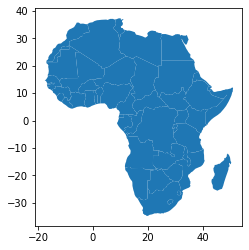

In [77]:
africa.plot()

In [78]:
cities['geometry'] = cities.buffer(2)

/Users/attawutn/opt/anaconda3/envs/SWU_tech/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


<AxesSubplot:>

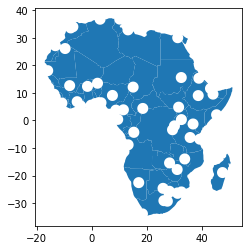

In [79]:
gpd.overlay(africa, cities, how='difference').plot()

In [80]:
type(cities)

geopandas.geodataframe.GeoDataFrame

## Exercise 9
ให้นิสิต Overlay ระหว่างข้อมูลจุดที่ตั้งอาคารกับขอบเขตมหาวิทยาลัยบูรพา

In [81]:
BUU_point['geometry'] = BUU_point.buffer(0.0003,resolution = 1)

/Users/attawutn/opt/anaconda3/envs/SWU_tech/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


<AxesSubplot:>

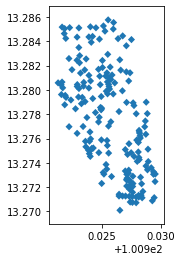

In [82]:
BUU_point.plot()

<AxesSubplot:>

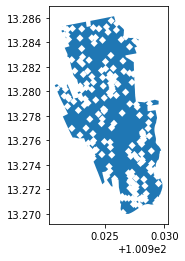

In [83]:
gpd.overlay(BUU_polygon,BUU_point, how='difference').plot()